# Purchase Propensity Model

In the world of marketing and data analytics, the Propensity Model has become an indispensable tool for companies looking to optimize their strategies and maximize their revenues. But what exactly is a Propensity Model and how can you implement it in your business? In this article, we will explore the fundamentals of this model, its importance, and the steps to create an effective one.

## What is a Propensity Model?
A Propensity Model is a type of predictive analysis that uses historical data to predict the likelihood of an individual performing a specific action in the future. This action can be purchasing a product, subscribing to a service, abandoning a shopping cart, among others.

## Why is it important?
- **Resource Optimization:** It allows companies to focus their efforts and resources on customers with the highest likelihood of conversion.
- **Personalization:** It helps to personalize offers and messages for different customer segments, improving the user experience.
- **Improved ROI:** By identifying the customers most likely to take an action, it enhances the return on investment in marketing campaigns.

## Components of a Propensity Model
- **Historical Data:** Previous information about customer behavior.
- **Predictive Variables:** Factors that can influence the customer's propensity to take an action.
- **Machine Learning Algorithm:** Used to analyze the data and make predictions.

## Steps to Create a Propensity Model
1. **Data Collection:** Gather relevant data about your customers, such as purchase history, brand interactions, demographic data, etc.
2. **Data Cleaning and Preprocessing:** Ensure the data is clean and ready for analysis. This includes handling missing values, normalization, and transforming categorical variables.
3. **Variable Selection:** Identify the variables that will be used in the model. These should be significant and impact customer behavior.
4. **Algorithm Selection:** Choose an appropriate machine learning algorithm, such as logistic regression, decision trees, random forests, among others.
5. **Model Training:** Split the data into training and testing sets, and use the training set to fit the model.
6. **Model Evaluation:** Assess the model's performance using metrics like accuracy, recall, F1-score, AUC-ROC, etc.
7. **Implementation:** Once validated, implement the model to predict your customers' propensity in real-time.


## Introduction
In today's competitive environment, companies are continuously seeking ways to enhance their marketing and sales strategies. Data science offers advanced tools to analyze large volumes of data and extract valuable insights. One of the most relevant models in this field is the purchase propensity model, which predicts the likelihood of a customer making a future purchase. This project focuses on developing and evaluating a purchase propensity model using machine learning techniques to help businesses identify customers with the highest conversion probability, thereby optimizing resources and maximizing revenue.

## Objectives
- Collect and Preprocess Data: Gather a relevant dataset that includes demographic information, purchase history, customer interactions, and any other significant variables.

- Develop a Predictive Model: Use machine learning techniques to build a model that predicts customers' likelihood of making a purchase.

- Evaluate the Model: Validate the model's performance using evaluation metrics such as precision, recall and the ROC-AUC curve.

- Implement the Model: Develop a strategy to integrate the model into the company's marketing system, enabling effective customer segmentation and campaign personalization.

- Optimize Resources: Use the model's predictions to optimize marketing spend and improve customer conversion rates.

# Imports

In [78]:
# @title import libraries
# calculations
import numpy as np
import pandas as pd

# dates
import datetime as dt
from datetime import date
#from dateutil.relativedelta import relativedelta

# plots
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [79]:
# @title import data
# set the file paths
df_products = pd.read_csv(r'products.csv')
df_sales = pd.read_csv(r'sales.csv')
df_customers = pd.read_csv(r'customers.csv')

In [80]:
# @title
df_products

,product_id,product_name,family_product
0,4657,em_acount,account
1,3819,debit_card,payment_card
2,1364,pension_plan,pension_plan
3,2234,payroll,account
4,2235,payroll_account,account
5,8871,emc_account,account
6,2312,credit_card,payment_card
7,2335,short_term_deposit,investment
8,2336,long_term_deposit,investment
9,2673,securities,investment


In [81]:
# @title
df_sales

,sale_id,customer_id,month_sale,product_id,net_margin
0,6666,33620,2022-05,2335,238.225
1,6667,35063,2022-06,2335,406.300
2,6668,37299,2022-02,2335,319.925
3,6669,39997,2022-02,2335,377.975
4,6670,44012,2022-02,2335,420.075
...,...,...,...,...,...
238569,247434,1553456,2023-05,4657,14.175
238570,247435,1553541,2023-05,4657,16.625
238571,247436,1553559,2023-05,4657,18.250
238572,247437,1553565,2023-05,4657,20.575


In [82]:
# @title
df_customers

,customer_id,country_id,region_code,gender,age,salary,entry_date,entry_channel,active_customer,segment,...,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,15891,ES,28.0,H,59,NaN,2022-07,KAT,1.0,NaN,...,0,0,0,0,0,0,0,0,0,1
1,16203,ES,8.0,V,70,NaN,2022-12,KAT,1.0,02 - PARTICULARES,...,0,0,0,0,0,0,0,0,0,1
2,16502,ES,28.0,H,58,NaN,2022-09,KHN,1.0,02 - PARTICULARES,...,0,0,0,0,0,0,1,0,0,1
3,17457,ES,28.0,H,53,25601.44,2021-09,KAT,1.0,02 - PARTICULARES,...,1,0,0,0,0,0,0,1,0,1
4,17970,ES,28.0,V,75,NaN,2019-04,KAT,1.0,02 - PARTICULARES,...,0,0,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151488,1553456,ES,28.0,H,32,NaN,2023-05,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,1
151489,1553541,ES,49.0,V,54,NaN,2023-05,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,1
151490,1553559,ES,8.0,H,43,NaN,2023-05,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,1
151491,1553565,ES,45.0,H,68,NaN,2023-05,NaN,0.0,NaN,...,0,0,0,0,0,0,0,0,0,1


In [83]:
# @title The product with the highest average net margin
# We merge the sales and product datasets to get the product name
# We group by product and calculate the average margin
# We convert it to a dataframe
# We sort the margin from highest to lowest
# We visualize the first one

df_sales.merge(df_products, on='product_id', how='left').groupby(['product_name'])['net_margin'].mean().to_frame().sort_values('net_margin', ascending=False).head(1)

,net_margin
product_name,
pension_plan,1494.387276


The product with the highest average net margin is: pension_plan, with: 1.494

# Defining the Parameters

We want to predict which customers will buy the product pension_plan. To do this, we need to train a model with customers who have purchased it and customers who have not. We need to know what the customers were like at the time of purchase. Therefore, we will look for the purchase of customers in the sales dataset, as we can match the purchase date with the customer's attributes at the time of purchase. We are not interested in customers who bought the product previously, because we don't know what they were like at the time of purchase!

We create the target 'compra_pension_plan' according to the following conditions:

- The success cases are customers who have purchased the 'pension_plan' product from the sales list, with their attributes at the time of purchase.
- The non-success cases are customers who did not purchase the product from the sales list nor possess the product from a previous purchase.

Customers who bought the product previously cannot be considered a success for generating the model because we do not know their attributes at the time of purchase: their age, salary, products, tenure, or region they had. We know what they have now, but they may be very different from what they had when they purchased.

In [84]:
#@title Positive Cases
# We will list the customers who have purchased pension_plan from the sales dataset.

# Filter the purchases of pension_plan.
df_pension_plan = df_sales[df_sales['product_id']==1364]

# Keep the IDs of the buyers in a list.
buyers = list(df_pension_plan['customer_id'])
buyers[:5]

[32376, 33205, 35849, 36148, 41264]

In [85]:
# @title
# Number of Customers Who Purchased pension_plan from the Sales Dataset
len(buyers)

19124

Add the target variable

In [86]:
# @title We create the target variable

# We create a dataset copy of the client dataset
df = df_customers.copy()

# We create the target variable with 1 if the client is in the list of buyers, 0 if not
df['buys_pension_plan'] = df['customer_id'].apply(lambda id: 1 if id in buyers
                                                    else 0)

# We filter out clients who bought pension_plan or do not possess it. This way, we remove clients who previously bought pension_plan
df = df[ (df['buys_pension_plan']==1) | (df['pension_plan']==0) ]

df

,customer_id,country_id,region_code,gender,age,salary,entry_date,entry_channel,active_customer,segment,...,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,buys_pension_plan
0,15891,ES,28.0,H,59,NaN,2022-07,KAT,1.0,NaN,...,0,0,0,0,0,0,0,0,1,0
1,16203,ES,8.0,V,70,NaN,2022-12,KAT,1.0,02 - PARTICULARES,...,0,0,0,0,0,0,0,0,1,0
2,16502,ES,28.0,H,58,NaN,2022-09,KHN,1.0,02 - PARTICULARES,...,0,0,0,0,0,1,0,0,1,0
3,17457,ES,28.0,H,53,25601.44,2021-09,KAT,1.0,02 - PARTICULARES,...,0,0,0,0,0,0,1,0,1,0
5,17980,ES,28.0,V,77,70615.45,2022-05,KFA,1.0,01 - TOP,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151488,1553456,ES,28.0,H,32,NaN,2023-05,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,1,0
151489,1553541,ES,49.0,V,54,NaN,2023-05,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,1,0
151490,1553559,ES,8.0,H,43,NaN,2023-05,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,1,0
151491,1553565,ES,45.0,H,68,NaN,2023-05,NaN,0.0,NaN,...,0,0,0,0,0,0,0,0,1,0


In [87]:
# @title
# perimeter size
len(df)

148600

In [88]:
# @title Dataset copy

# We make a copy of the dataset before data cleaning to avoid having to execute the entire notebook for each test
df_copy = df.copy()

# Data Cleaning

In [89]:
# @title
# We load the copy of the original dataset for each test
df = df_copy.copy()

## Nulls

In [90]:
# @title
# Number of nulls
df.isnull().sum()

customer_id               0
country_id                0
region_code              47
gender                    2
age                       0
salary                73927
entry_date                0
entry_channel         62385
active_customer           0
segment               62626
short_term_deposit        0
loans                     0
mortgage                  0
funds                     0
securities                0
long_term_deposit         0
em_account_pp             0
credit_card               0
payroll                   0
pension_plan              0
payroll_account           0
emc_account               0
debit_card                0
em_account_p              0
em_acount                 0
buys_pension_plan         0
dtype: int64

In [91]:
# @title
# Percentage of nulls
round(df.isnull().sum().div(len(df)).mul(100), 1)

customer_id            0.0
country_id             0.0
region_code            0.0
gender                 0.0
age                    0.0
salary                49.7
entry_date             0.0
entry_channel         42.0
active_customer        0.0
segment               42.1
short_term_deposit     0.0
loans                  0.0
mortgage               0.0
funds                  0.0
securities             0.0
long_term_deposit      0.0
em_account_pp          0.0
credit_card            0.0
payroll                0.0
pension_plan           0.0
payroll_account        0.0
emc_account            0.0
debit_card             0.0
em_account_p           0.0
em_acount              0.0
buys_pension_plan      0.0
dtype: float64

In [92]:
# @title Option 1: Delete the variables

# df = df.drop(['salary'], axis=1)
# df = df.drop(['entry_channel'], axis=1)
# df = df.drop(['segment'], axis=1)

In [93]:
# @title Option 2: Impact the most probable data

# Impact median for salary, mode for entry_channel and segment
# df['salary'] = df['salary'].fillna(df['salary'].median())
# df['entry_channel'] = df['entry_channel'].fillna(df['entry_channel'].mode())
# df['segment'] = df['segment'].fillna(df['segment'].mode())

In [94]:
# @title Option 3: Delete the rows

# Delete rows with any null
df = df.dropna()

# Duplicates

In [95]:
# @title
df.duplicated().sum()

0

# Variable management

In [96]:
# @title
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53206 entries, 3 to 95253
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         53206 non-null  int64  
 1   country_id          53206 non-null  object 
 2   region_code         53206 non-null  float64
 3   gender              53206 non-null  object 
 4   age                 53206 non-null  int64  
 5   salary              53206 non-null  float64
 6   entry_date          53206 non-null  object 
 7   entry_channel       53206 non-null  object 
 8   active_customer     53206 non-null  float64
 9   segment             53206 non-null  object 
 10  short_term_deposit  53206 non-null  int64  
 11  loans               53206 non-null  int64  
 12  mortgage            53206 non-null  int64  
 13  funds               53206 non-null  int64  
 14  securities          53206 non-null  int64  
 15  long_term_deposit   53206 non-null  int64  
 16  em_a

In [97]:
# @title
df.nunique()

customer_id           53206
country_id                1
region_code              50
gender                    2
age                      83
salary                49728
entry_date               45
entry_channel            40
active_customer           2
segment                   3
short_term_deposit        2
loans                     2
mortgage                  2
funds                     2
securities                2
long_term_deposit         2
em_account_pp             1
credit_card               2
payroll                   2
pension_plan              2
payroll_account           2
emc_account               2
debit_card                2
em_account_p              2
em_acount                 2
buys_pension_plan         2
dtype: int64

In [99]:
# @title Variables with low variance
# We remove variables where the most frequent value represents more than 99% of the items.
print('The following variables have been deleted.')
for col in df.columns:
  # Count the frequency of each value. value_counts sorts it by default from highest to lowest. We keep the first value.
  frequency_of_most_frequent_value = list(df[col].value_counts(normalize=True))[0]
  # Remove variables whose most frequent value has more than 99% frequency
  if frequency_of_most_frequent_value > 0.99:
    df = df.drop(col, axis=1)
    print(col)

The following variables have been deleted.


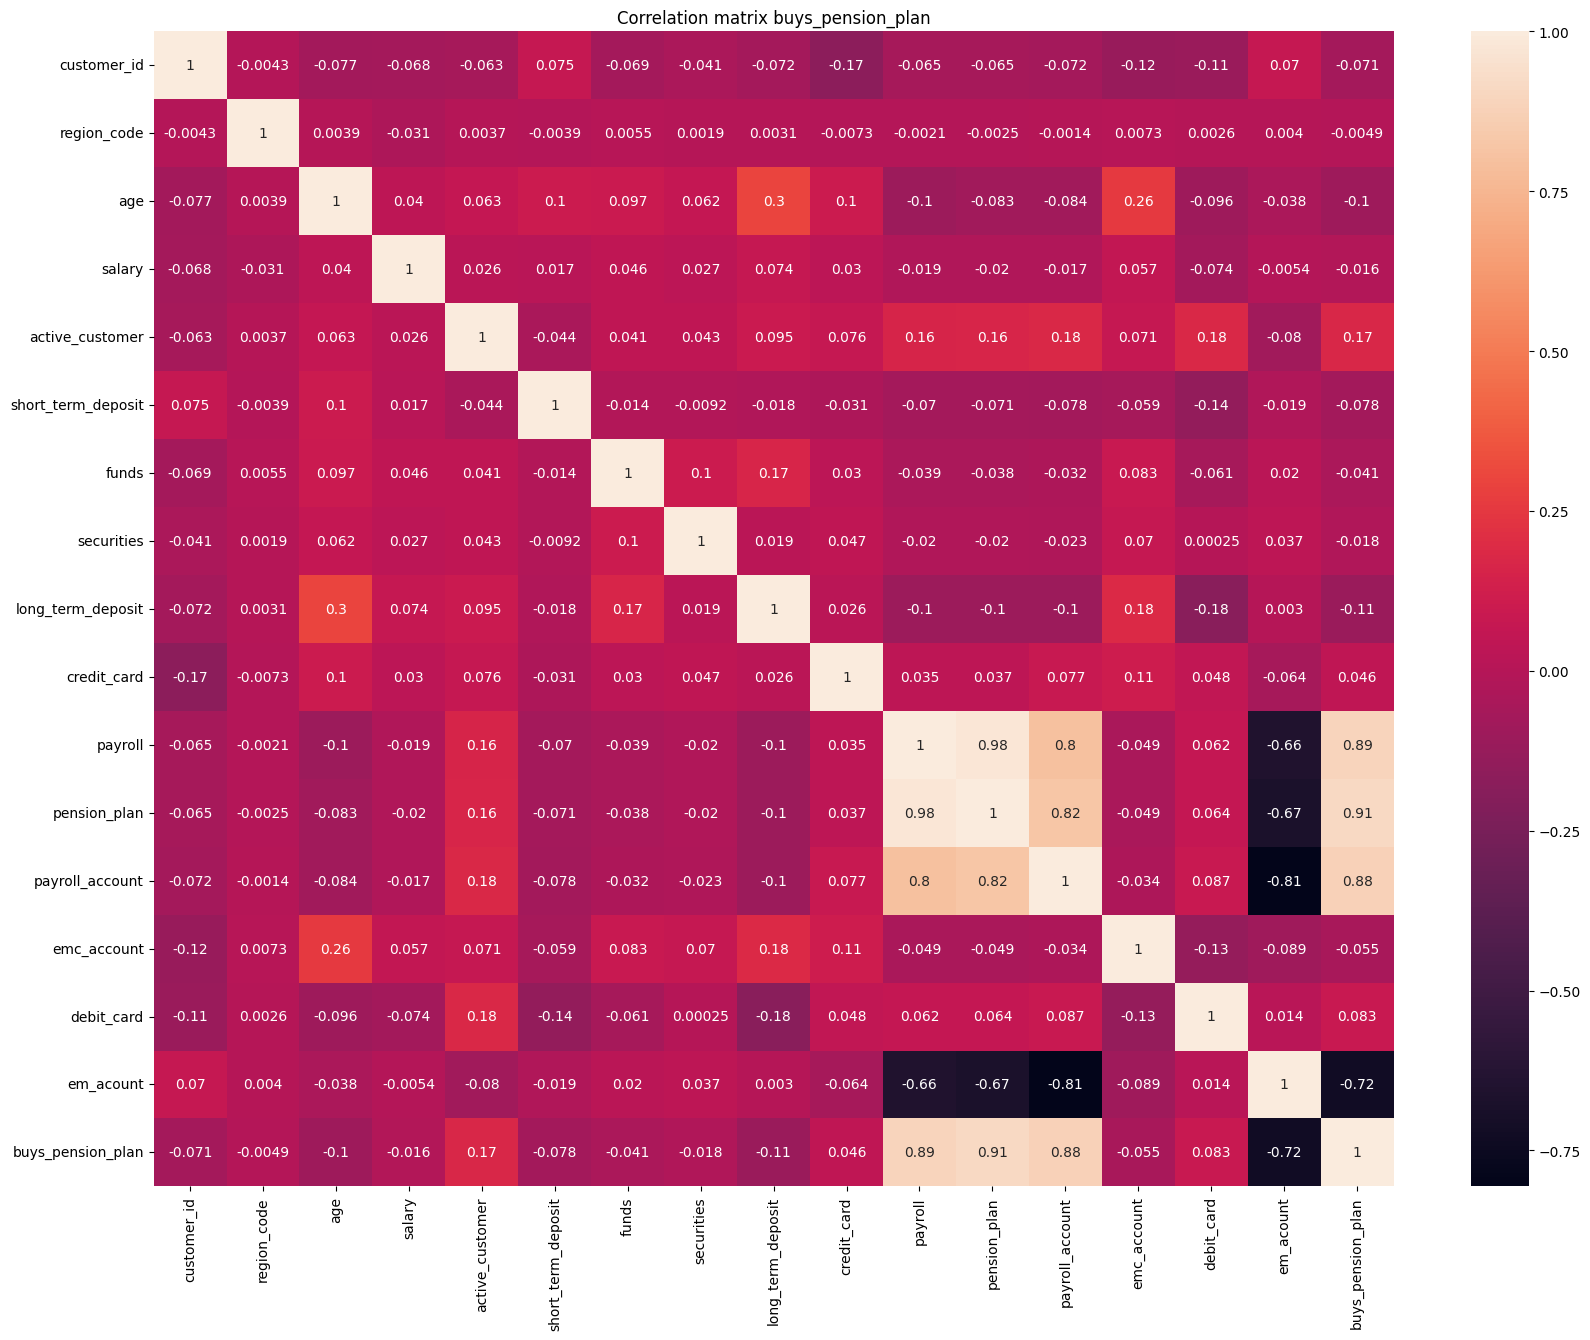

In [101]:
# @title correlations
plt.rcParams['figure.figsize'] = 20, 15
sns.heatmap(df.corr(), annot=True, cmap="rocket").set_title(('Correlation matrix {}'.format(df.columns[-1])))
plt.show()

- We remove the variable 'pension_plan' because it is directly linked to the target. 
- We also remove the variable 'payroll' (Direct debits) due to its high similarity with 'pension_plan' (correlation 0.98).
- Additionally, 'payroll_account' (Account with bonuses for direct debits) is removed for the same reason.

In [23]:
# @title
df.drop(['pension_plan', 'payroll'], axis=1, inplace=True)

# Interesting exercise: try removing and keeping the variable, and measure the AUC and the quality of prediction probabilities
df.drop(['payroll_account'], axis=1, inplace=True)

### You can evaluate how removing each variable affects the AUC (Area Under the Curve) metric and the quality of prediction probabilities. It's a good way to understand each variable's contribution to the model and whether any of them have a significant impact on predictive capability

### region_code

Region_code, despite being a numerical variable, is actually categorical (it could be replaced by the name of the region). Taking the mean of region_code doesn't make sense.

#### We will save the most frequent values

In [24]:
# @title
# Let's look at the cumulative frequency
df_freq_region_code = df['region_code'].value_counts(normalize=True).mul(100).cumsum().to_frame().reset_index()
df_freq_region_code.columns = ['region_code', 'accumulated_frequency']
df_freq_region_code

,region_code,accumulated_frequency
0,28.0,30.257866
1,8.0,38.845243
2,46.0,44.983648
3,41.0,49.986844
4,3.0,53.580423
5,30.0,56.837575
6,29.0,59.822201
7,15.0,62.464760
8,47.0,64.722024
9,11.0,66.921024


In [25]:
# @title
# We will keep the region_code values that account for 90% of the occurrences; the rest will be labeled as 'other'

# Create a list with the most frequent region_code values
top_region_code = list(df_freq_region_code[df_freq_region_code['accumulated_frequency']<90]['region_code'])

# Change infrequent values to 'other'
df['region_code'] = df['region_code'].apply(lambda x: int(x) if x in top_region_code
                                                else 'other_region_code')

### entry_channel

Uncomment if the variable is not deleted.

In [26]:
# @title
# Let's look at the cumulative frequency
# df_entry_channel = df['entry_channel'].value_counts(normalize=True).mul(100).cumsum().to_frame().reset_index()
# df_entry_channel.columns = ['entry_channel', 'accumulated_frequency']
# df_entry_channel

In [27]:
# @title
# We will save the region_code values that account for 90% of the occurrences; the rest will be labeled as 'other'.

#Create a list with the most frequent ones
# top_entry_channel = list(df_entry_channel[df_entry_channel['accumulated_frequency']<91]['entry_channel'])

#Change infrequent values to 'other'.
# df['entry_channel'] = df['entry_channel'].apply(lambda x: x if x in top_entry_channel
#                                                    else 'other_entry_channel')

## Antiquity

In [28]:
# @title
#Change the data type of the entry_date variable
df['entry_date'] = pd.to_datetime(df['entry_date'])

#Create antiquity
df['antiquity'] = pd.Timestamp(date.today()) - df['entry_date']

#Convert antiquity to days
df['antiquity'] = df['antiquity'].apply(lambda x: x.days)

#Delete entry_date.
df = df.drop('entry_date', axis=1)

# EDA (Exploratory Data Analysis)

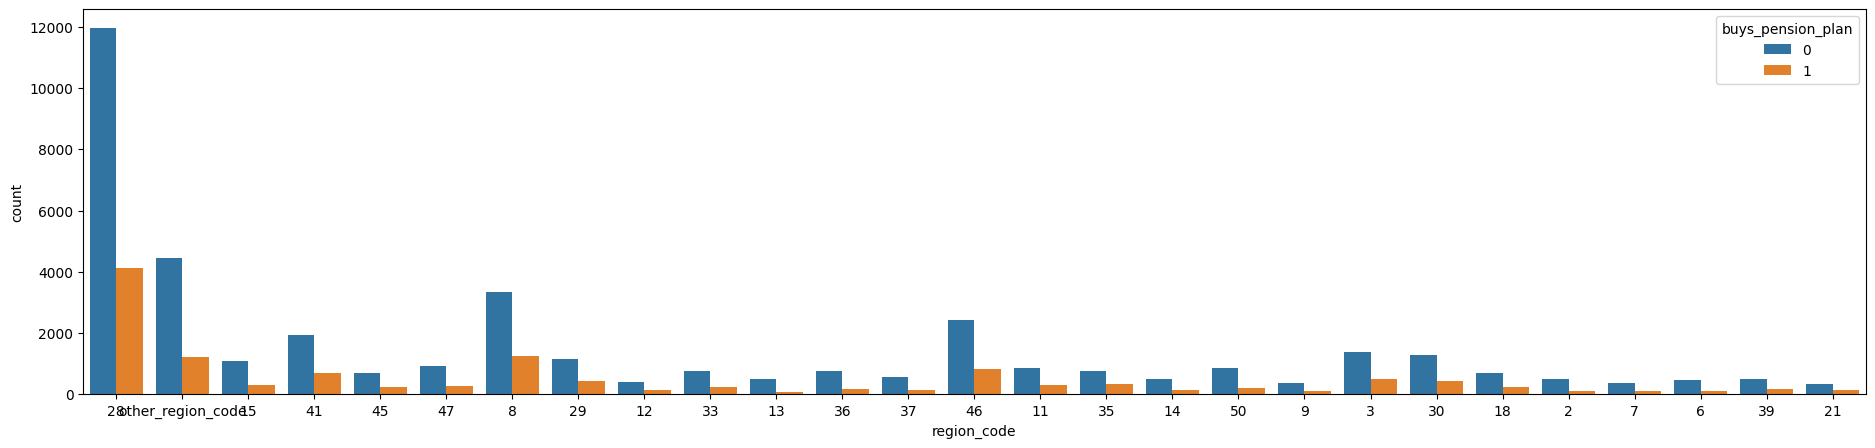

In [29]:
# @title
plt.rcParams['figure.figsize'] = 23, 5
sns.countplot(data=df, x='region_code', hue='buys_pension_plan')
plt.show()

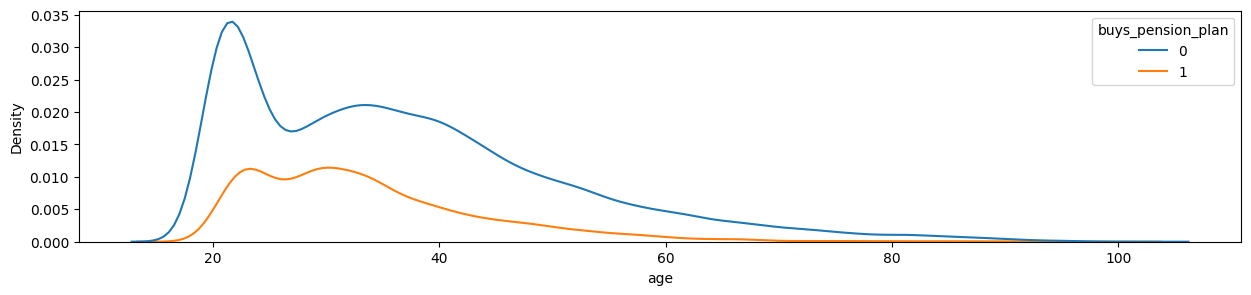

In [30]:
# @title
plt.rcParams['figure.figsize'] = 15, 3
sns.kdeplot(data=df, x='age', hue='buys_pension_plan')
plt.show()

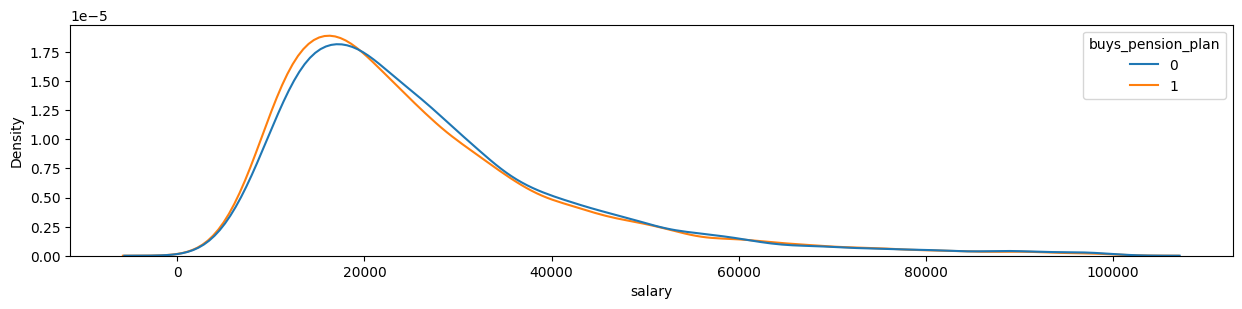

In [69]:
# @title
plt.rcParams['figure.figsize'] = 15, 3
sns.kdeplot(data=df_training, x='salary', hue='buys_pension_plan')
plt.show()

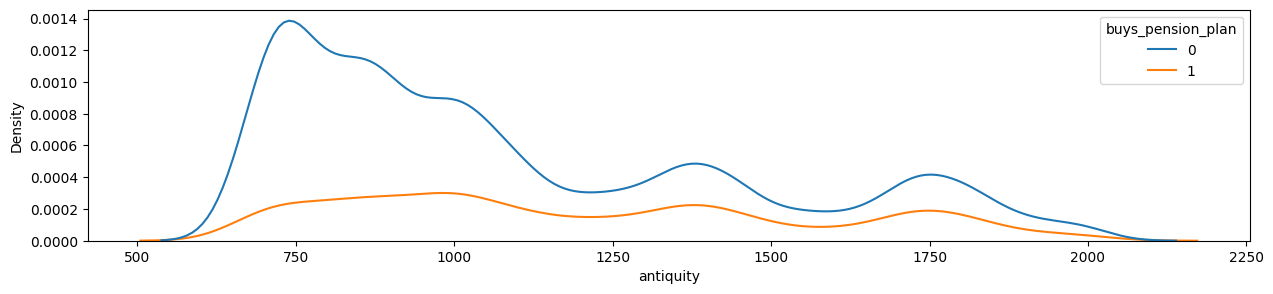

In [32]:
# @title
plt.rcParams['figure.figsize'] = 15, 3
sns.kdeplot(data=df, x='antiquity', hue='buys_pension_plan')
plt.show()

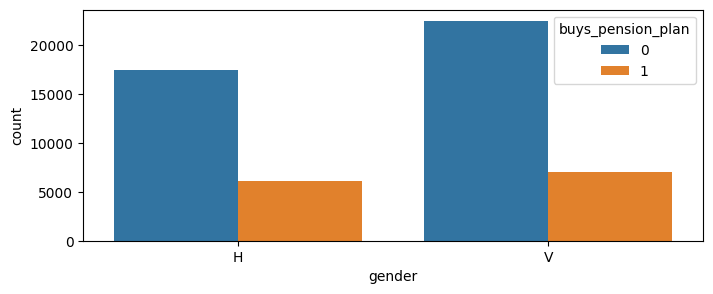

In [33]:
# @title
plt.rcParams['figure.figsize'] = 8, 3
sns.countplot(data=df, x='gender', hue='buys_pension_plan')
plt.show()

In [71]:
# @title
# plt.rcParams['figure.figsize'] = 10, 3
# sns.countplot(data=df_training, x='entry_channel', hue='buys_pension_plan')
# plt.show()

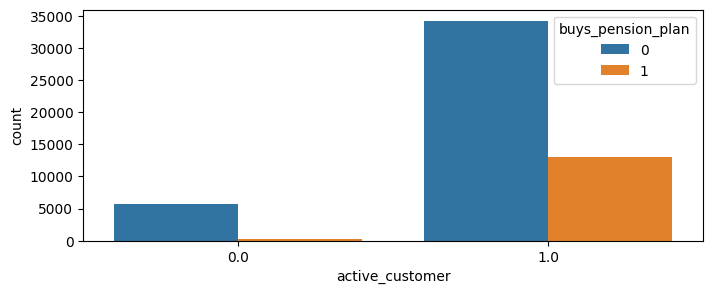

In [35]:
# @title
plt.rcParams['figure.figsize'] = 8, 3
sns.countplot(data=df, x='active_customer', hue='buys_pension_plan')
plt.show()

In [73]:
# @title
# plt.rcParams['figure.figsize'] = 8, 3
# sns.countplot(data=df_training, x='segment', hue='buys_pension_plan')
# plt.show()

You can do much more analysis: for example, analyzing variables two by two.

# Preprocessing

In [37]:
# @title one hot encoding
# By doing this on the entire dataset, we ensure that both the training, testing, and prediction datasets have the same columns.
df = pd.get_dummies(df)
df.shape

(53206, 86)

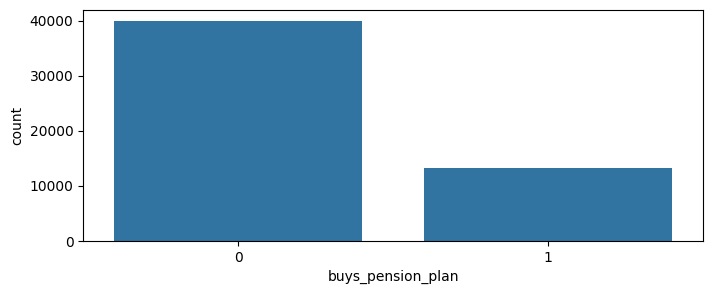

In [38]:
# @title Partitioning of the target
plt.rcParams['figure.figsize'] = 8, 3
sns.countplot(data=df, x='buys_pension_plan')
plt.show()

We have an imbalanced dataset. To improve the model, we will train it with an equal number of successes and non-successes.

## Training set y Prediction set

### training set

In [39]:
# @title
# Success cases
df_positive = df[df['buys_pension_plan']==1]
len(df_positive)

13218

In [40]:
# @title
# Non-success cases
df_negative = df[df['buys_pension_plan']==0]
len(df_negative)

39988

In [41]:
# @title
#Randomly select the same number of non-success cases as success cases.
df_negative = df_negative.sample(len(df_positive), replace=False, random_state=42)
len(df_negative)

13218

In [42]:
# @title
#Our training dataset for the model is the union of positives and negatives.
df_training = pd.concat([df_positive, df_negative])

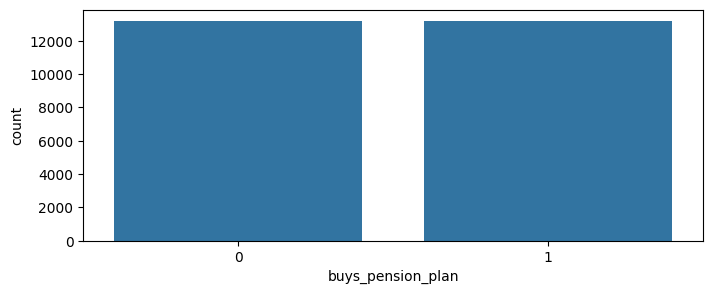

In [43]:
# @title
plt.rcParams['figure.figsize'] = 8, 3
sns.countplot(data=df_training, x='buys_pension_plan')
plt.show()

In [44]:
# @title
#We remove the variable customer_id.
df_training = df_training.drop('customer_id', axis=1)

In [45]:
# @title
df_training

,age,salary,active_customer,short_term_deposit,funds,securities,long_term_deposit,credit_card,emc_account,debit_card,...,entry_channel_KHL,entry_channel_KHM,entry_channel_KHN,entry_channel_KHO,entry_channel_KHP,entry_channel_KHQ,entry_channel_RED,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO
26,47,45023.19,1.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
34,45,49942.62,1.0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
37,58,31200.47,1.0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
87,77,45478.63,1.0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
89,48,37631.30,1.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8671,27,25663.81,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
40570,27,18166.87,1.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
54372,22,14287.31,1.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
71124,20,10419.75,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [46]:
# @title
df_training.shape

(26436, 85)

# Prediction set

Our prediction dataset consists of all customers who have never purchased the pension plan product

In [47]:
# @title
#We filter out customers without a purchase (previously, we removed customers who already had pension_plan)
df_prediction = df[df['buys_pension_plan']==0]

We remove the customer_id variable, but we save the list of customer IDs in a list for delivering the final prediction.

##### - Caution: from this point onward, do not change the order of rows in the dataset or delete any rows!

In [48]:
# @title
#Save the list of customer IDs: very important for constructing the prediction dataset.
customers_id = list(df_prediction['customer_id'])

# We remove the customer_id variable.
df_prediction = df_prediction.drop('customer_id', axis=1)

In [49]:
# @title
df_prediction

,age,salary,active_customer,short_term_deposit,funds,securities,long_term_deposit,credit_card,emc_account,debit_card,...,entry_channel_KHL,entry_channel_KHM,entry_channel_KHN,entry_channel_KHO,entry_channel_KHP,entry_channel_KHQ,entry_channel_RED,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO
3,53,25601.44,1.0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,77,70615.45,1.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,48,34028.24,1.0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
9,56,24393.34,1.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10,53,42235.81,1.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95226,41,13025.42,1.0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
95239,59,30764.62,1.0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
95244,60,9403.06,1.0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
95246,20,43963.00,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [50]:
# @title
df_prediction.shape

(39988, 85)

## Feature importance

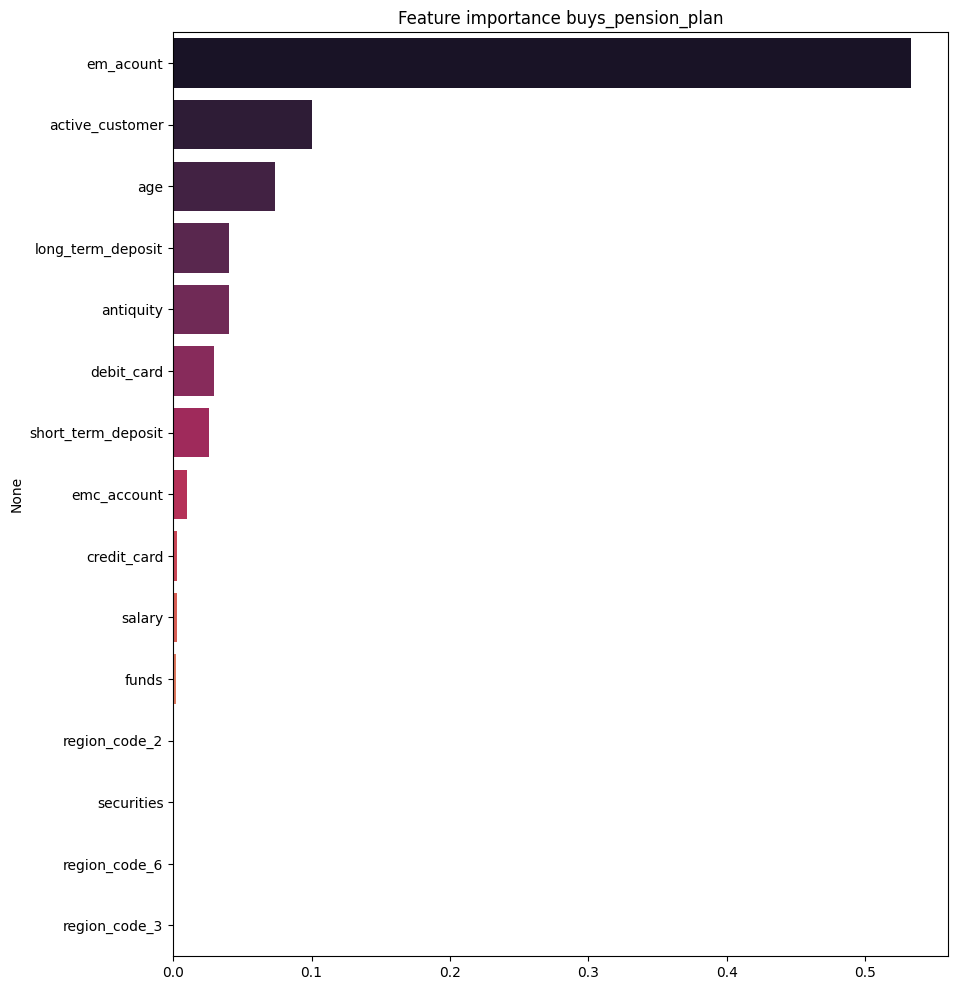

In [102]:
# @title
params = {'random_state': 42, 'n_jobs': 4, 'n_estimators': 100, 'max_depth': 4}

y = df_training['buys_pension_plan']
x = df_training.drop('buys_pension_plan',axis=1)

#Train a RandomForest Classifier.
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)

#Plot the top 15 feature importances.
features = clf.feature_importances_[:15]
columnas = x.columns[:15]
imp = pd.Series(data=features, index=columnas).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance {}".format('buys_pension_plan'))
ax = sns.barplot(y=imp.index, x=imp.values, palette="rocket", orient='h')
plt.show()

In [52]:
# @title
# Out of curiosity, try removing the variable with the highest score in feature importance to see the impact.
#df_training.drop(['em_acount'], axis=1, inplace=True)

## Split train/test

We will train with 70% of the training dataset and keep 30% for testing to evaluate the model.

In [53]:
# @title

# We define the target variable.
y = df_training['buys_pension_plan']

# We remove the target variable from the training dataset and from the prediction dataset.
X = df_training.drop('buys_pension_plan', axis=1)
df_prediction = df_prediction.drop('buys_pension_plan', axis=1)

# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# @title
## We check the sizes of the datasets.
print('X_train ', X_train.shape)
print('X_test  ', X_test.shape)

X_train  (18505, 84)
X_test   (7931, 84)


## Standardization

In [55]:
# @title
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)           # Standardize and define the standardization rule.
X_test = scaler.transform(X_test)                 # Standardize according to the rule defined with X_train.
df_prediction = scaler.transform(df_prediction)   # Standardize according to the rule defined with X_train.

# Training

We will use the AUC value to measure the performance of 6 different models.

In [56]:
# @title
def measurement(y_t, y_p):
  """Print the ROC curve and the AUC"""
  
  # calculate the fpr and tpr for all thresholds of the classification
  fpr, tpr, threshold = metrics.roc_curve(y_t, y_p)
  roc_auc = metrics.auc(fpr, tpr)

  # method I: plt
  import matplotlib.pyplot as plt
  plt.figure(figsize=(8, 6))
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  return roc_auc

In [57]:
# @title
def to_train(Xtrain, Xtest, ytrain, ytest):
  """Train 6 models.
      Print the ROC curve and AUC value for each model
      Return a dataframe with AUC values rounded to 5 decimal places for each model"""

  # Create an empty list for AUC
  lista_aucs = []

  # Support Vector Machine
  print('Support Vector Machine')
  svclassifier = SVC(kernel="linear", max_iter=20)

  svclassifier.fit(Xtrain, ytrain)
  y_pred = svclassifier.predict(Xtest)

  roc_auc = measurement(ytest, y_pred)
  lista_aucs.append(('SVC', round(roc_auc, 5)))
  print('*'*80)

  # Logistic Regression
  print('Logistic regression')
  lr = LogisticRegression(max_iter=40)

  lr.fit(Xtrain, ytrain)
  y_pred = lr.predict(Xtest)

  roc_auc = measurement(ytest, y_pred)
  lista_aucs.append(('Logistic regression', round(roc_auc, 5)))
  print('*'*80)

  # Decision tree classsifier
  print('Decision tree classsifier')
  dt_base = DecisionTreeClassifier(random_state=42)

  dt_base.fit(Xtrain, ytrain)
  y_pred = dt_base.predict(Xtest)

  roc_auc = measurement(ytest, y_pred)
  lista_aucs.append(('decision tree classifier', round(roc_auc, 5)))
  print('*'*80)

  # Random forest
  print('Random forest')
  rf_base = RandomForestClassifier(random_state=42)

  rf_base.fit(Xtrain, ytrain)
  y_pred = rf_base.predict(Xtest)

  roc_auc = measurement(ytest, y_pred)
  lista_aucs.append(('random forest', round(roc_auc, 5)))
  print('*'*80)

  # Gradient boosting
  print('Gradient boosting')
  gbc_base = GradientBoostingClassifier(random_state=42)

  gbc_base.fit(Xtrain, ytrain)
  y_pred = gbc_base.predict(Xtest)

  roc_auc = measurement(ytest, y_pred)
  lista_aucs.append(('gradient boosting', round(roc_auc, 5)))
  print('*'*80)

  # XGBClassifier
  print('XGBClassifier')
  xgbc_base = xgb.XGBClassifier(random_state=42)

  xgbc_base.fit(Xtrain, ytrain)
  y_pred = xgbc_base.predict(Xtest)

  roc_auc = measurement(ytest, y_pred)
  lista_aucs.append(('XGB classifier', round(roc_auc, 5)))
  print('*'*80)

  df_aucs = pd.DataFrame(lista_aucs, columns=['models', 'AUC'])
  df_aucs = df_aucs.set_index('models')

  return df_aucs

Support Vector Machine


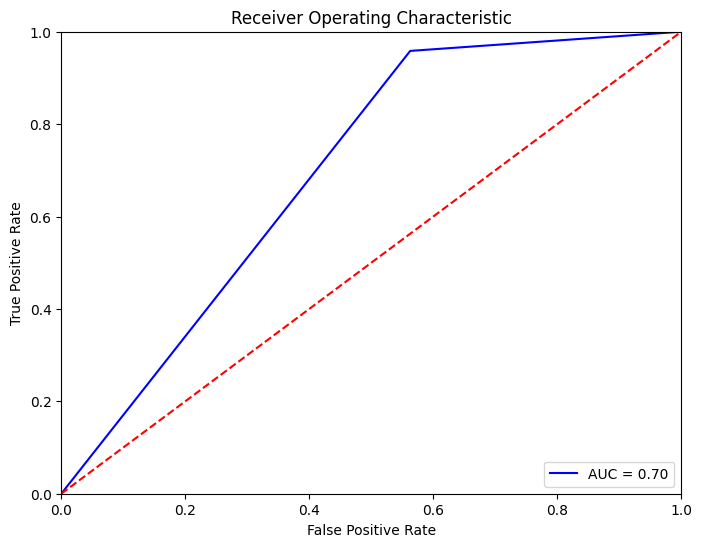

********************************************************************************
Logistic regression


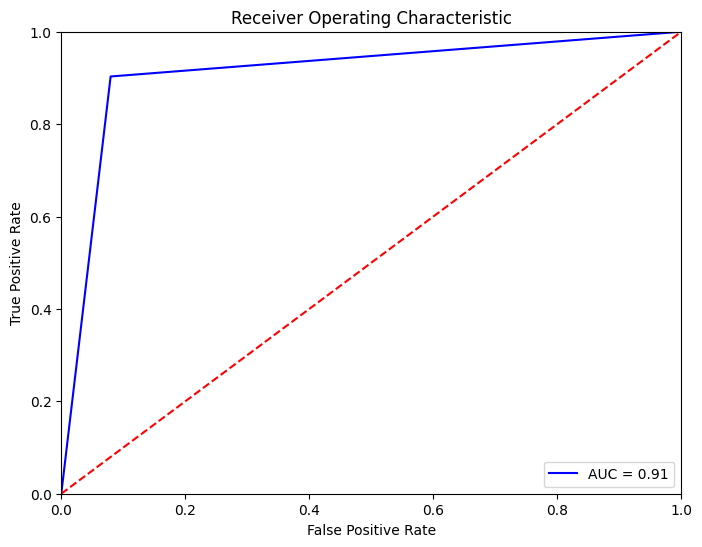

********************************************************************************
Decision tree classsifier


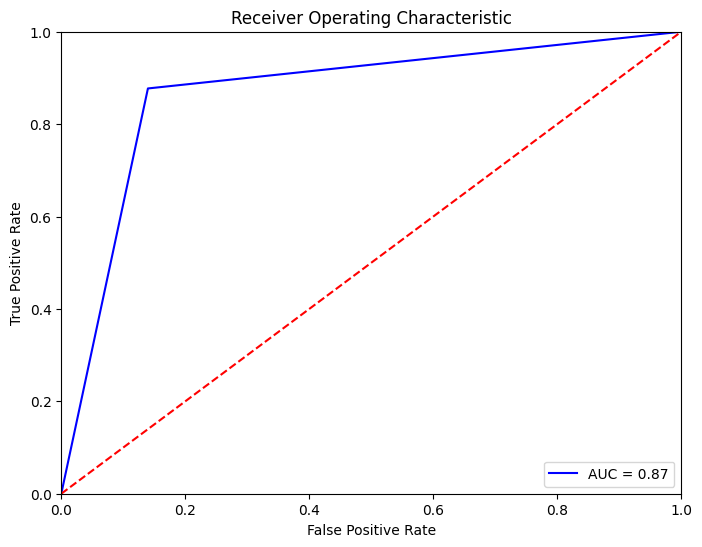

********************************************************************************
Random forest


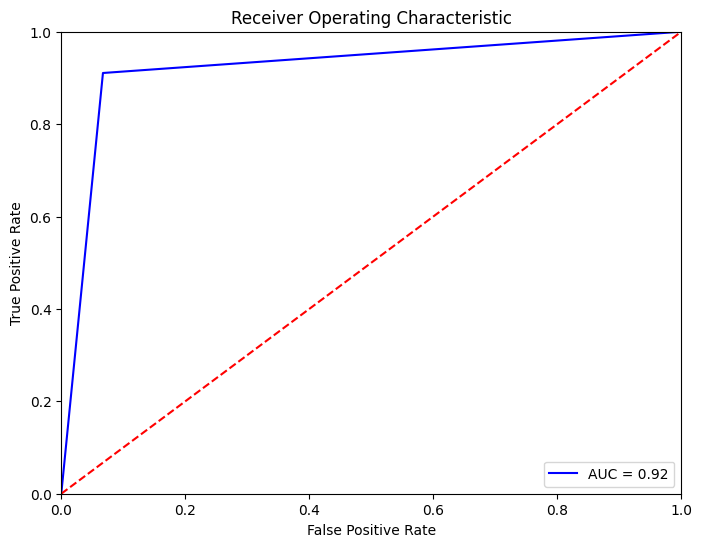

********************************************************************************
Gradient boosting


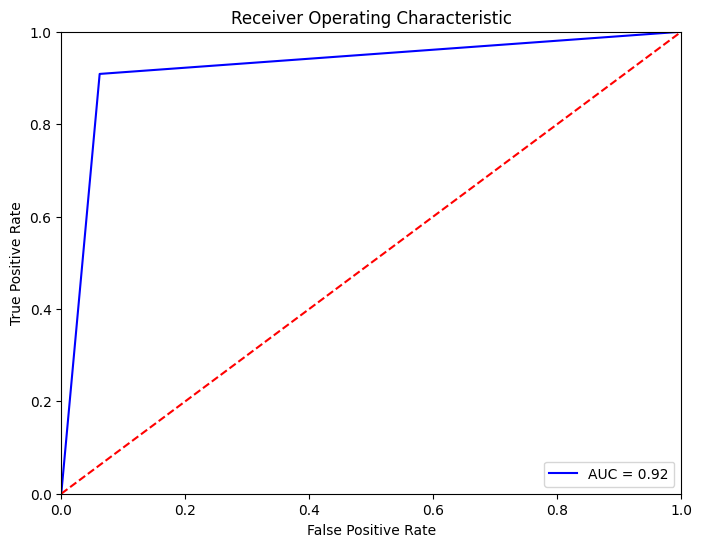

********************************************************************************
XGBClassifier


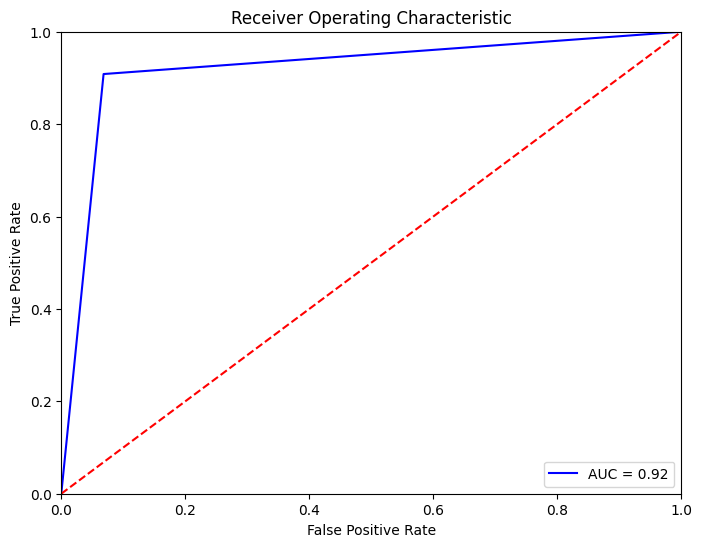

********************************************************************************


In [58]:
#  @title Model competition

# Uncomment to start the competition
aucs = to_train(X_train, X_test, y_train, y_test)

In [59]:
# @title Measurement

# Uncomment to view the AUCs by algorithm
aucs

,AUC
models,
SVC,0.69784
Logistic regression,0.91176
decision tree classifier,0.86872
random forest,0.92172
gradient boosting,0.92337
XGB classifier,0.92009


In [60]:
# @title Hyperparameter tuning for the best model

# # List of parameters to try
parameters = {'learning_rate': [0.05, 0.1, 0.15, 0.2],
              'n_estimators': [100, 300, 500],
              'subsample': [0.7, 1],
              'max_depth': [3, 4, 5],
              'max_leaf_nodes': [None, 2, 3]}

# # Model definition
gbc_hp =  GradientBoostingClassifier()

# # gridsearch
gbc_grid = GridSearchCV(gbc_hp,
                        parameters,
                        cv=2,
                        verbose=True)
gbc_grid.fit(X_train, y_train)

# # Print best parameters
gbc_grid.best_estimator_

Fitting 2 folds for each of 216 candidates, totalling 432 fits


GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=300,
                           subsample=0.7)

In [61]:
# @title Training the best model

gbc_base = GradientBoostingClassifier(random_state=42)

## With the parameters from the grid search
# gbc_base = GradientBoostingClassifier(learning_rate=0.05, max_depth=4, subsample=0.7,random_state=42)

gbc_base.fit(X_train, y_train)
y_pred = gbc_base.predict(X_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
round(roc_auc, 6)

0.92337

## Results of missing value treatment:

- With all variables, removing rows: 0.923877
- Without salary: 0.924295
- Without entry_channel: 0.921638
- Without segment: 0.924769
- Without salary and segment: 0.919314
- Without segment, with median salary and mode entry_channel: 0.919227

#### AUC with default parameters: 0.924769
#### AUC with parameters after GridSearch: 0.92565

# Prediction

In [62]:
# @title Calculation
# Prediction is made using predict.

prediction_tuples = gbc_base.predict_proba(df_prediction)
prediction_tuples

array([[0.92501578, 0.07498422],
       [0.9269056 , 0.0730944 ],
       [0.88652697, 0.11347303],
       ...,
       [0.95434376, 0.04565624],
       [0.97701093, 0.02298907],
       [0.98647144, 0.01352856]])

In [64]:
# @title
# predict_proba returns tuples with the probability of 0 and the probability of 1, in this order
# we keep the 2nd element of each tuple

prediction = []
for tuples in prediction_tuples:
  prediction.append(tuples[1])
prediction[:5]

[0.07498422090434974,
 0.07309440075087047,
 0.1134730346820135,
 0.05038654337272764,
 0.0784420296462091]

In [65]:
# @title
# Create a dataframe with customer IDs and their predictions

df_pred = pd.DataFrame()
df_pred['customers_id'] = customers_id
df_pred['probability'] = prediction

# Sort the dataset in descending order of propensity
df_pred = df_pred.sort_values('probability', ascending=False)
df_pred

,customers_id,probability
16186,1283974,0.981053
37874,1436595,0.978177
22404,1369226,0.975678
1857,1015175,0.975260
13580,1249776,0.974977
...,...,...
29624,1394212,0.002453
31437,1399229,0.002450
34439,1417061,0.002267
25760,1383356,0.002082


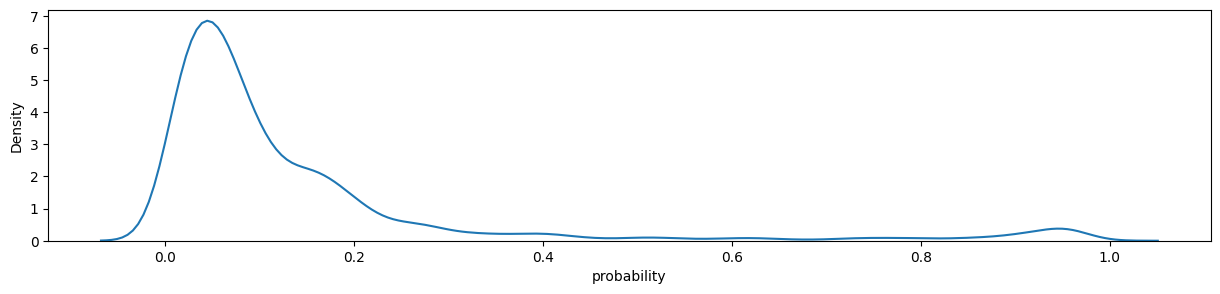

In [66]:
# @title Analysis of predictions
#You can view the distribution of customer probabilities

plt.rcParams['figure.figsize'] = 15, 3
sns.kdeplot(data=df_pred, x='probability')
plt.show()

Average propensities:

In [67]:
# @title
# You can measure the mean of the propensities

np.mean(prediction)

0.13945200666479368

### Average propensities:
- with payroll_account 9.8%
- without payroll_account 13.9%

***Number of customers with a propensity > 80%:***

In [68]:
# @title
# Number of customers can be measured.

len(df_pred[df_pred['probability']>0.8])

1522

Customers with more than 80% propensity:

- with payroll_account 1,392
- without payroll_account 1,606

In [ ]:
# @title Export the data.

df_pred.to_excel(r'propensity_pension_plan.xlsx', sheet_name='data_extraction')

## Conclusion
Developing a purchase propensity model provides companies with a significant competitive advantage by allowing them to focus on customers with the highest conversion probability. Throughout this project, we identified key factors influencing customers' purchase decisions and built a precise and robust predictive model. Implementing this model not only enables the personalization of marketing campaigns but also optimizes resource use, thereby improving the efficiency and effectiveness of business strategies. In summary, the purchase propensity model represents a powerful tool for any company seeking to maximize performance and strengthen customer relationships.